In [1]:
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.experimental.set_memory_growth(physical_devices[1], True)

In [2]:
model = tf.keras.models.load_model('unet_1.h5')
model.load_weights('weights.h5')

W0826 16:39:11.366206 140341907625792 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [3]:
H, W = 512, 512

In [4]:
def get_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, size=[H, W])
    img /= 255.
    return img[None, ...]

In [5]:
images = glob('dataset/val_images/*')

In [45]:
def plot_predictions(image):
    fig = plt.figure(figsize=(16, 8))
    img = get_image(images[image])
    y = model.predict(img)[0] > 0.5
    ax = fig.add_subplot(1, 2, 1)
    ax.set_title('img')
    ax.imshow(img[0, ...])
    ax = fig.add_subplot(1, 2, 2)
    ax.set_title('mask')
    ax.imshow(np.squeeze(y))
    fig.savefig(f'results/{image}.png')

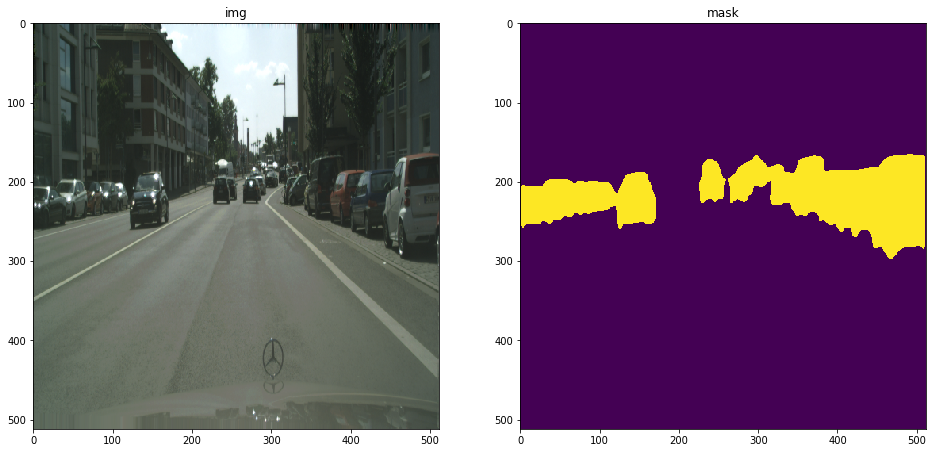

In [46]:
plot_predictions(240)

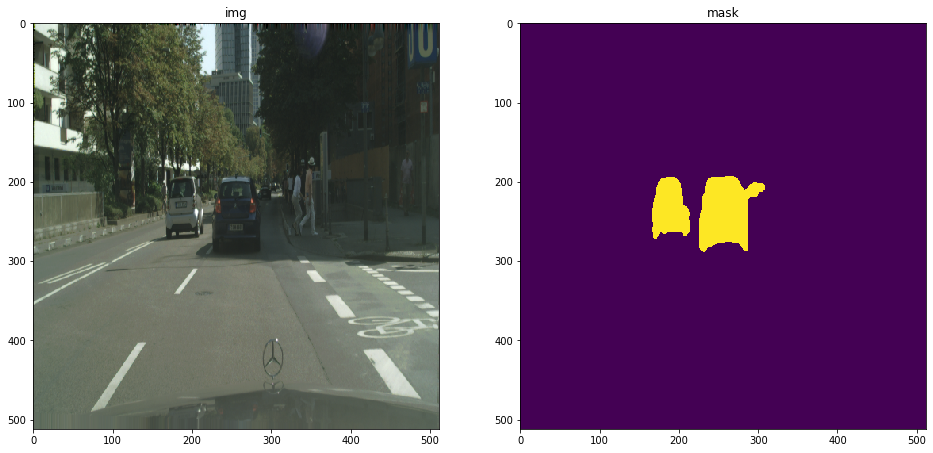

In [47]:
plot_predictions(20)

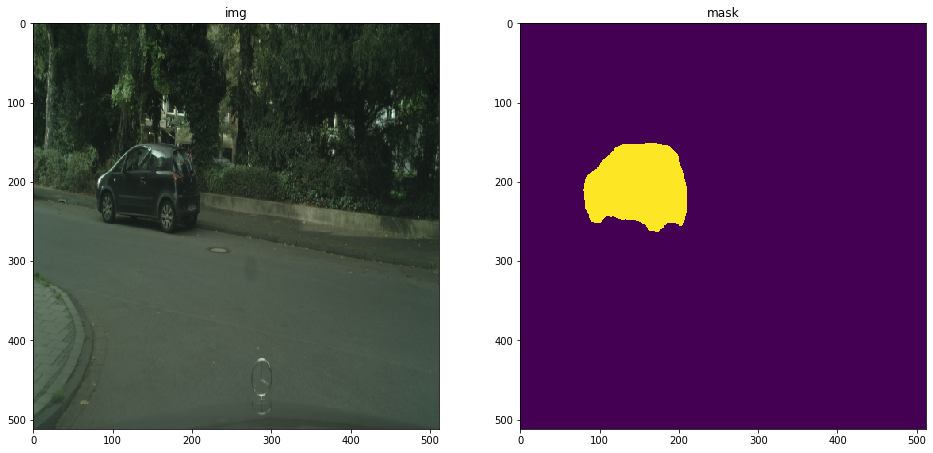

In [50]:
plot_predictions(450)